In [1]:
import pandas as pd

df = pd.read_csv('airbnb.csv')

df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Data Description

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [ ]:
Data Cleaning

In [5]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64


Treating Missing values

In [7]:
df['Price'] = df['Price'].str.replace('[\$,]', '', regex=True).astype(float)

df = df.dropna(subset=['Host Since', 'Property Type'])

df['Beds'] = df['Beds'].fillna(df['Beds'].median())

df['Zipcode'] = df['Zipcode'].fillna(df['Zipcode'].mode()[0])

df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].median())
df['Review Scores Rating (bin)'] = df['Review Scores Rating (bin)'].fillna(df['Review Scores Rating (bin)'].median())

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Host Id                       0
Host Since                    0
Name                          0
Neighbourhood                 0
Property Type                 0
Review Scores Rating (bin)    0
Room Type                     0
Zipcode                       0
Beds                          0
Number of Records             0
Number Of Reviews             0
Price                         0
Review Scores Rating          0
dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rithi\AppData\Local\Temp\ipykernel_23352\2857416981.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].str.replace('[\$,]', '', regex=True).astype(float)


Fixing data types and feature engineering

In [9]:
df['Host Since'] = pd.to_datetime(df['Host Since'])

df['Hosting Duration (Years)'] = (pd.Timestamp('today') - df['Host Since']).dt.days / 365

df[['Host Since', 'Hosting Duration (Years)']].head()


,Host Since,Hosting Duration (Years)
3,2008-06-26,17.101370
4,2008-06-26,17.101370
5,2008-07-25,17.021918
6,2008-08-12,16.972603
7,2008-08-15,16.964384


Removing duplicates 

In [11]:
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

df = df.drop_duplicates()


Number of duplicate rows: 17


Detect and Treat Outliers 

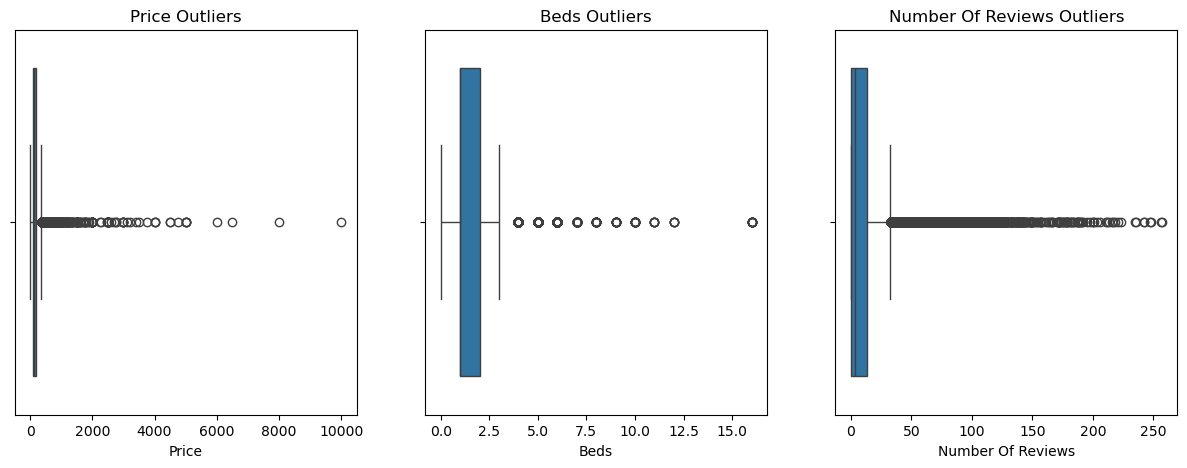

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.boxplot(x=df['Price'])
plt.title('Price Outliers')

plt.subplot(1,3,2)
sns.boxplot(x=df['Beds'])
plt.title('Beds Outliers')

plt.subplot(1,3,3)
sns.boxplot(x=df['Number Of Reviews'])
plt.title('Number Of Reviews Outliers')

plt.show()


In [17]:
import numpy as np
price_cap = df['Price'].quantile(0.99)
df['Price'] = np.where(df['Price'] > price_cap, price_cap, df['Price'])


In [25]:
price_cap = df['Price'].quantile(0.99)

current_max = df['Price'].max()

print(f"99th percentile price: {price_cap}")
print(f"Current max price: {current_max}")

if current_max <= price_cap:
    print("Price capping has been applied successfully.")
else:
    print("Price capping NOT applied.")


99th percentile price: 750.0
Current max price: 750.0
Price capping has been applied successfully.


Standardize Categorical Data

In [27]:
df['Property Type'] = df['Property Type'].str.strip().str.lower()
df['Room Type'] = df['Room Type'].str.strip().str.lower()

print(df['Property Type'].unique())
print(df['Room Type'].unique())


['apartment' 'house' 'other' 'bed & breakfast' 'loft' 'condominium'
 'townhouse' 'dorm' 'boat' 'cabin' 'villa' 'bungalow' 'camper/rv'
 'treehouse' 'tent' 'hut' 'lighthouse' 'chalet' 'castle']
['entire home/apt' 'private room' 'shared room']


In [33]:
# Rename 'Neighbourhood ' to 'Neighbourhood' (remove trailing space)
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

In [35]:
df_encoded = pd.get_dummies(df, columns=['Neighbourhood', 'Property Type', 'Room Type'], drop_first=True)

In [37]:
# Save cleaned version to CSV
df.to_csv('cleaned_airbnb.csv', index=False)


Descriptive Statistics

In [39]:
# Summary stats for numeric columns
print(df.describe())

# Summary stats for categorical columns
print(df.describe(include=['object']))

# Frequency counts for key categorical columns
print("\nTop 10 Neighbourhoods by count:")
print(df['Neighbourhood'].value_counts().head(10))

print("\nTop 10 Property Types by count:")
print(df['Property Type'].value_counts().head(10))

print("\nRoom Types count:")
print(df['Room Type'].value_counts())


            Host Id                     Host Since  \
count  3.045500e+04                          30455   
mean   1.272486e+07  2013-06-29 14:39:13.505171456   
min    5.000000e+02            2008-06-26 00:00:00   
25%    2.698888e+06            2012-06-21 00:00:00   
50%    8.541842e+06            2013-09-01 00:00:00   
75%    2.119070e+07            2014-09-12 00:00:00   
max    4.303307e+07            2015-08-31 00:00:00   
std    1.189845e+07                            NaN   

       Review Scores Rating (bin)       Zipcode          Beds  \
count                30455.000000  30455.000000  30455.000000   
mean                    90.537022  10587.458053      1.528682   
min                     20.000000   1003.000000      0.000000   
25%                     90.000000  10017.000000      1.000000   
50%                     90.000000  10065.000000      1.000000   
75%                     95.000000  11216.000000      2.000000   
max                    100.000000  99135.000000     16.000

Insights on price and ratings

In [42]:
# Average price by Neighborhood
avg_price_neigh = df.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Neighborhoods by average price:")
print(avg_price_neigh)

# Average review rating by Neighborhood
avg_rating_neigh = df.groupby('Neighbourhood')['Review Scores Rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Neighborhoods by average review rating:")
print(avg_rating_neigh)



Top 10 Neighborhoods by average price:
Neighbourhood
Manhattan        188.323432
Brooklyn         126.238663
Staten Island    123.666667
Queens           100.749011
Bronx             85.446064
Name: Price, dtype: float64

Top 10 Neighborhoods by average review rating:
Neighbourhood
Brooklyn         92.810030
Bronx            92.516035
Manhattan        92.385835
Queens           92.287033
Staten Island    91.938776
Name: Review Scores Rating, dtype: float64


In [44]:
print("Median Price:", df['Price'].median())
print("Mode Property Type:", df['Property Type'].mode()[0])
print("Price Variance:", df['Price'].var())
print("Price Skewness:", df['Price'].skew())
print("Price Kurtosis:", df['Price'].kurtosis())


Median Price: 125.0
Mode Property Type: apartment
Price Variance: 13316.359581855766
Price Skewness: 2.561775486713816
Price Kurtosis: 8.814897423372507


Correlation Matrix

                             Host Id  Review Scores Rating (bin)   Zipcode  \
Host Id                     1.000000                   -0.030817 -0.011080   
Review Scores Rating (bin) -0.030817                    1.000000  0.012616   
Zipcode                    -0.011080                    0.012616  1.000000   
Beds                       -0.003282                   -0.063930  0.015702   
Number of Records                NaN                         NaN       NaN   
Number Of Reviews          -0.273081                   -0.044887 -0.016628   
Price                      -0.063757                    0.061920 -0.182871   
Review Scores Rating       -0.013760                    0.974465  0.014386   
Hosting Duration (Years)   -0.883900                    0.033777  0.020340   

                                Beds  Number of Records  Number Of Reviews  \
Host Id                    -0.003282                NaN          -0.273081   
Review Scores Rating (bin) -0.063930                NaN        

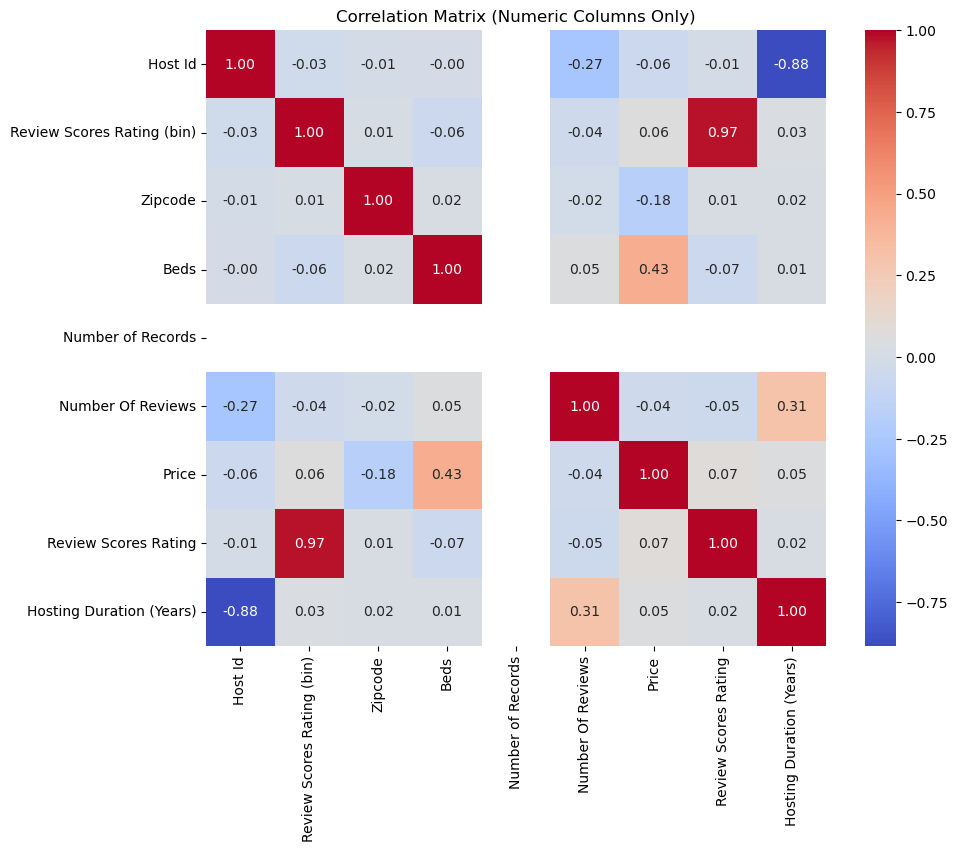

In [48]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()

print(corr)

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()


Value Counts with Proportion 

In [50]:
print(df['Property Type'].value_counts(normalize=True) * 100)


Property Type
apartment          88.931210
house               6.856017
loft                2.472500
bed & breakfast     0.591036
townhouse           0.446560
condominium         0.308652
other               0.154326
dorm                0.101790
boat                0.026268
villa               0.026268
camper/rv           0.022985
bungalow            0.013134
treehouse           0.013134
tent                0.013134
hut                 0.006567
cabin               0.006567
lighthouse          0.003284
chalet              0.003284
castle              0.003284
Name: proportion, dtype: float64


Cross Tabulations

In [52]:
pd.crosstab(df['Room Type'], df['Property Type'])

Property Type,apartment,bed & breakfast,boat,bungalow,cabin,camper/rv,castle,chalet,condominium,dorm,house,hut,lighthouse,loft,other,tent,townhouse,treehouse,villa
Room Type,,,,,,,,,,,,,,,,,,,
entire home/apt,15667,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
private room,10738,155,1,0,1,1,1,1,22,16,1256,2,0,312,29,4,52,1,4
shared room,679,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Group wise Aggregations

In [54]:
# Median price by Room Type
print(df.groupby('Room Type')['Price'].median())

# Average number of reviews by Property Type
print(df.groupby('Property Type')['Number Of Reviews'].mean())


Room Type
entire home/apt    175.0
private room        80.0
shared room         60.0
Name: Price, dtype: float64
Property Type
apartment           11.733237
bed & breakfast     19.372222
boat                18.250000
bungalow             5.500000
cabin               12.000000
camper/rv           10.571429
castle               2.000000
chalet             128.000000
condominium          4.893617
dorm                 6.161290
house               14.927682
hut                 23.000000
lighthouse           4.000000
loft                15.201859
other               10.765957
tent                 0.500000
townhouse            4.338235
treehouse           10.000000
villa               16.125000
Name: Number Of Reviews, dtype: float64


Price Distribution plot

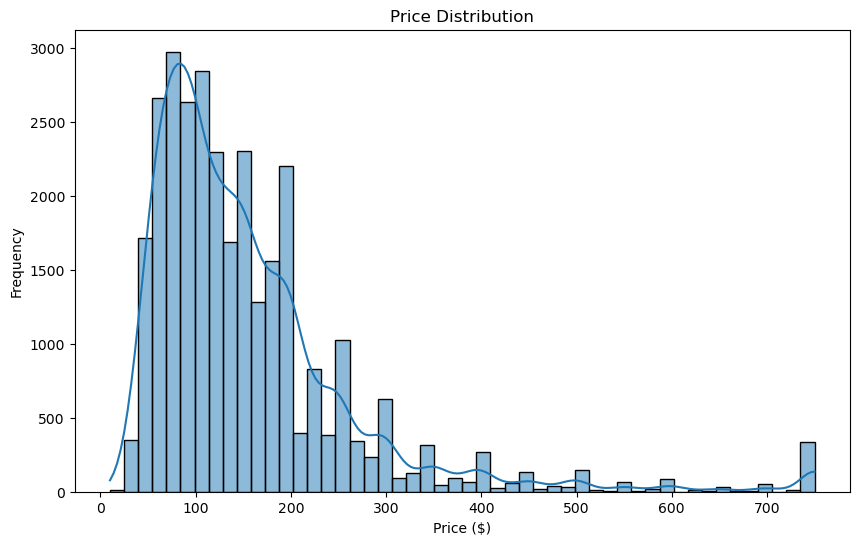

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


Scatter Plot

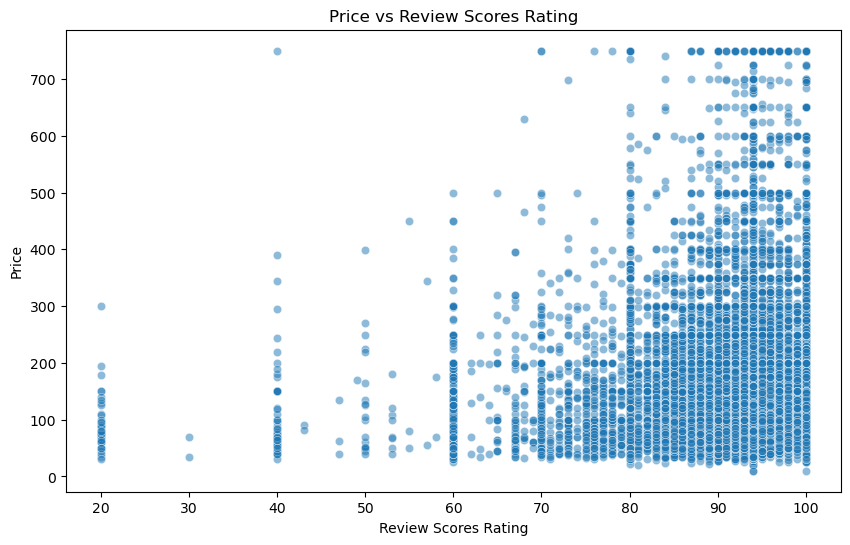

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Review Scores Rating', y='Price', data=df, alpha=0.5)
plt.title('Price vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()


Time Series Analysis 

In [56]:
# Extract year and month from Host Since
df['Host Year'] = df['Host Since'].dt.year
df['Host Month'] = df['Host Since'].dt.month

# Check counts of hosts by year
hosts_per_year = df['Host Year'].value_counts().sort_index()

print(hosts_per_year)


Host Year
2008      37
2009     501
2010    1374
2011    3300
2012    5757
2013    6440
2014    7899
2015    5147
Name: count, dtype: int64


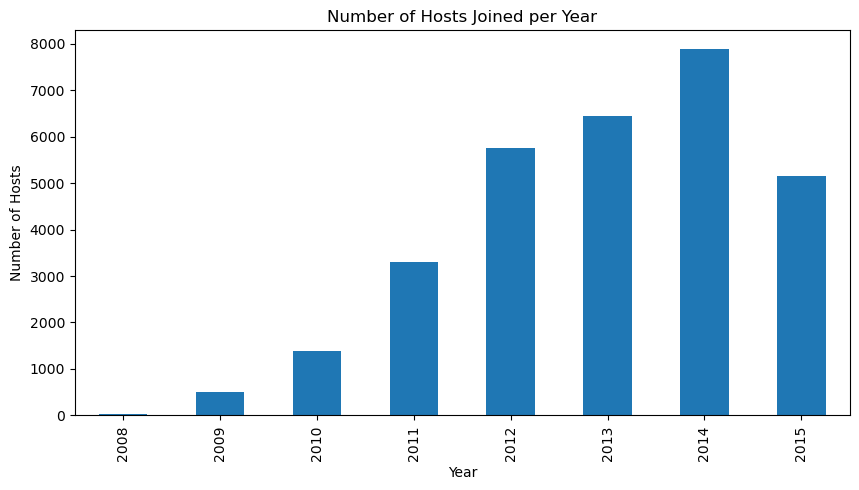

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
hosts_per_year.plot(kind='bar')
plt.title('Number of Hosts Joined per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hosts')
plt.show()


Geospatial analysis 

In [60]:
avg_price_neigh = df.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)
listings_per_neigh = df['Neighbourhood'].value_counts().head(10)

print("Top 10 Neighborhoods by Average Price:")
print(avg_price_neigh)

print("\nTop 10 Neighborhoods by Number of Listings:")
print(listings_per_neigh)


Top 10 Neighborhoods by Average Price:
Neighbourhood
Manhattan        188.323432
Brooklyn         126.238663
Staten Island    123.666667
Queens           100.749011
Bronx             85.446064
Name: Price, dtype: float64

Top 10 Neighborhoods by Number of Listings:
Neighbourhood
Manhattan        16025
Brooklyn         11665
Queens            2275
Bronx              343
Staten Island      147
Name: count, dtype: int64


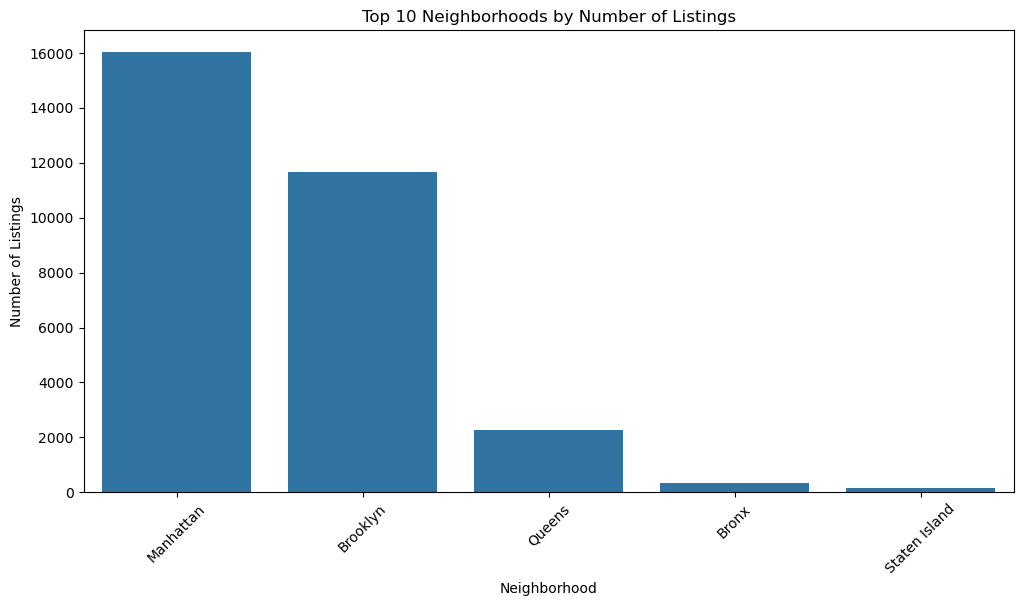

In [62]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=listings_per_neigh.index, y=listings_per_neigh.values)
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


C:\Users\rithi\AppData\Local\Temp\ipykernel_23352\3664230669.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listings_per_neigh.index, y=listings_per_neigh.values, palette='viridis')


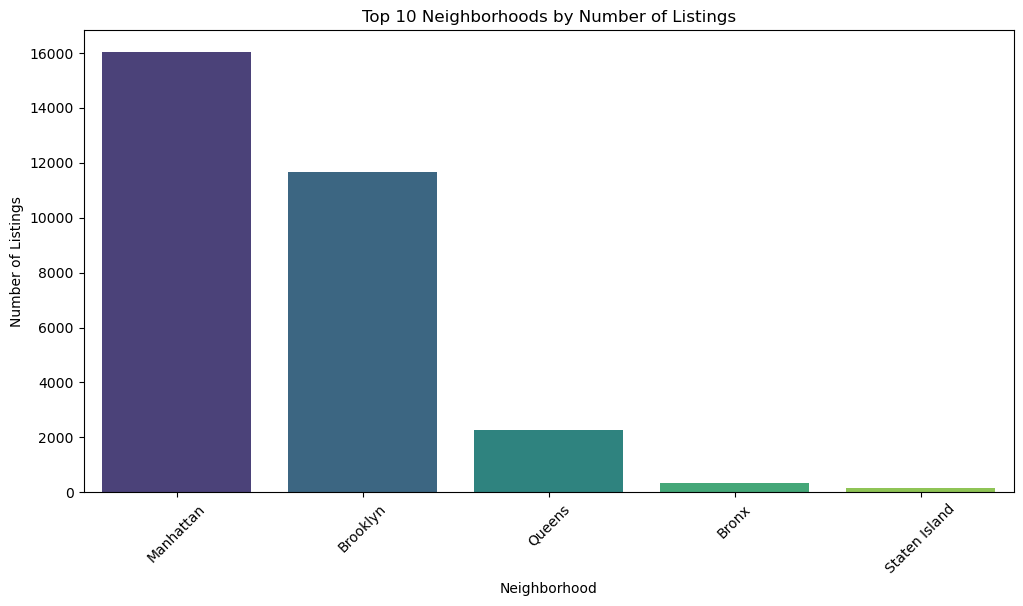

C:\Users\rithi\AppData\Local\Temp\ipykernel_23352\3664230669.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neigh.index, y=avg_price_neigh.values, palette='magma')


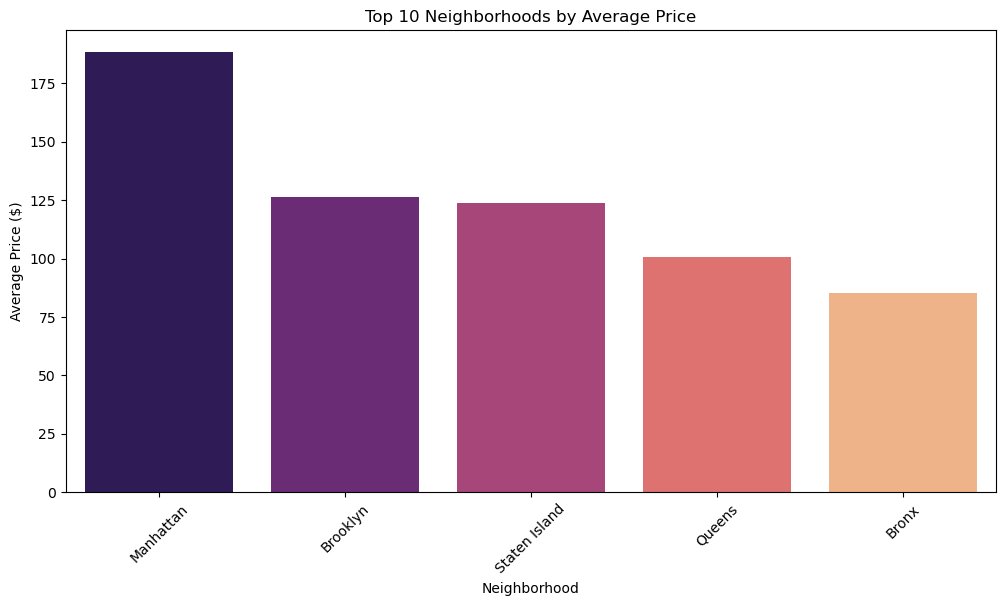

In [72]:
import seaborn as sns

# Top 10 neighborhoods by number of listings
listings_per_neigh = df['Neighbourhood'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=listings_per_neigh.index, y=listings_per_neigh.values, palette='viridis')
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Top 10 neighborhoods by average price
avg_price_neigh = df.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_neigh.index, y=avg_price_neigh.values, palette='magma')
plt.title('Top 10 Neighborhoods by Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


Data Visualizations

Price Distribution Overall and by Room Type

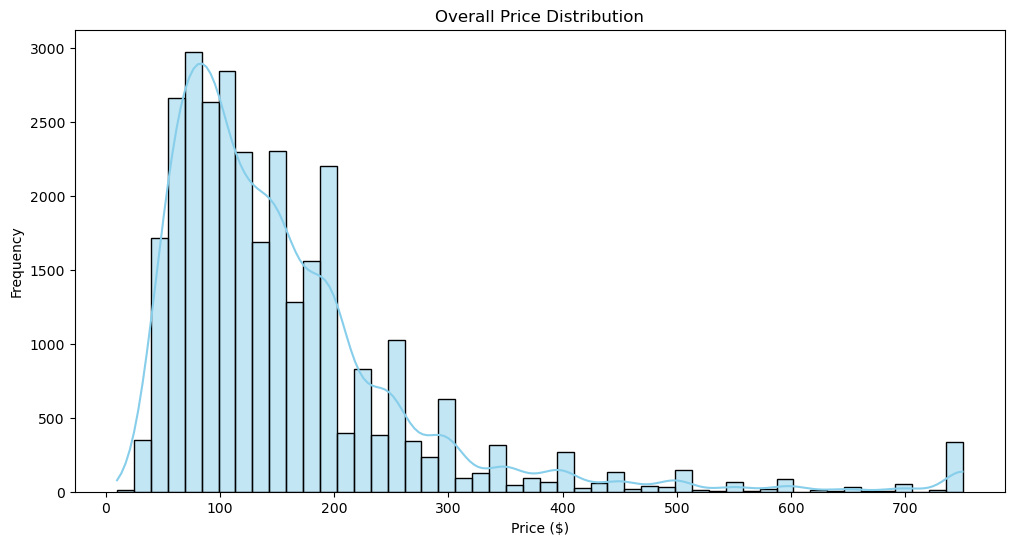

C:\Users\rithi\AppData\Local\Temp\ipykernel_23352\4210737271.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Room Type', y='Price', data=df, palette='Set2')


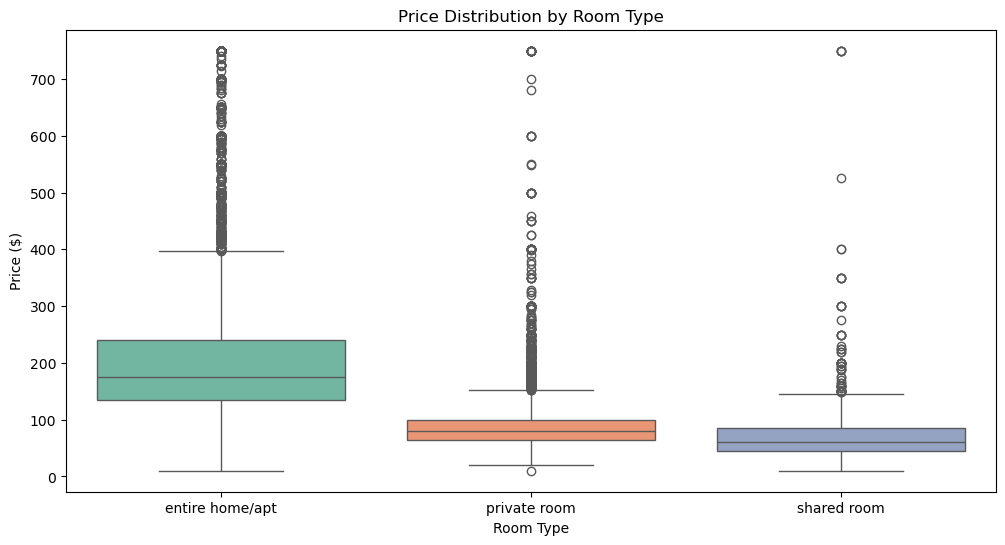

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df['Price'], bins=50, kde=True, color='skyblue')
plt.title('Overall Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Room Type', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()


Review Scores Rating Distribution

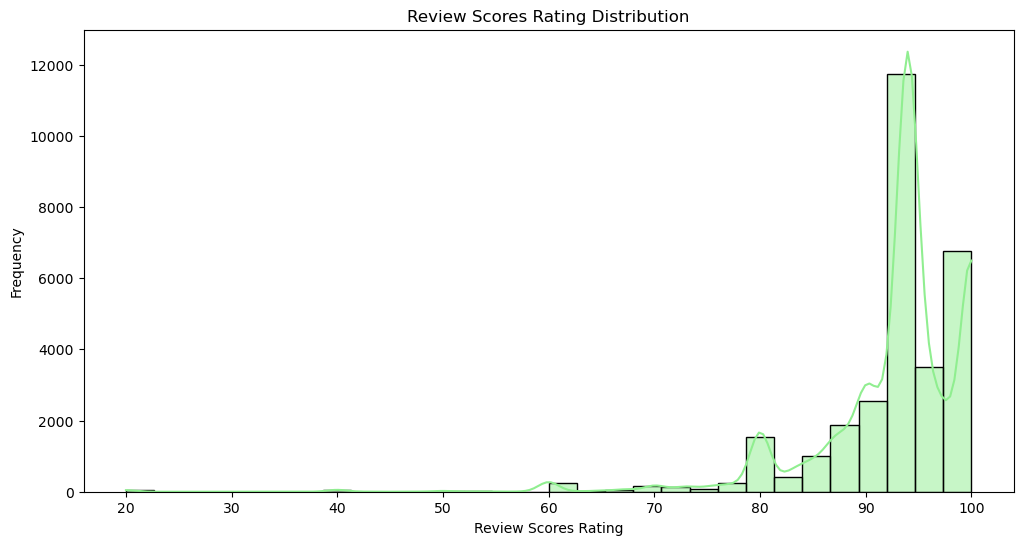

In [80]:
plt.figure(figsize=(12,6))
sns.histplot(df['Review Scores Rating'], bins=30, kde=True, color='lightgreen')
plt.title('Review Scores Rating Distribution')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()


Average Price vs. Number of Reviews (Scatter Plot)

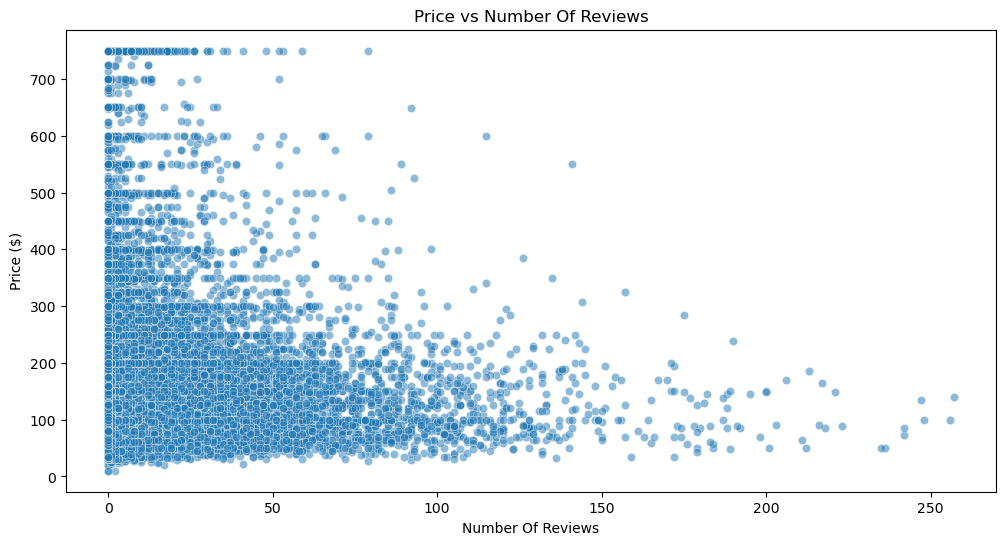

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Number Of Reviews', y='Price', data=df, alpha=0.5)
plt.title('Price vs Number Of Reviews')
plt.xlabel('Number Of Reviews')
plt.ylabel('Price ($)')
plt.show()


Average Price by Neighborhood (Bar Plot of Top 10 Neighborhoods)

C:\Users\rithi\AppData\Local\Temp\ipykernel_23352\1404460541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_neigh.index, y=top10_neigh.values, palette='coolwarm')


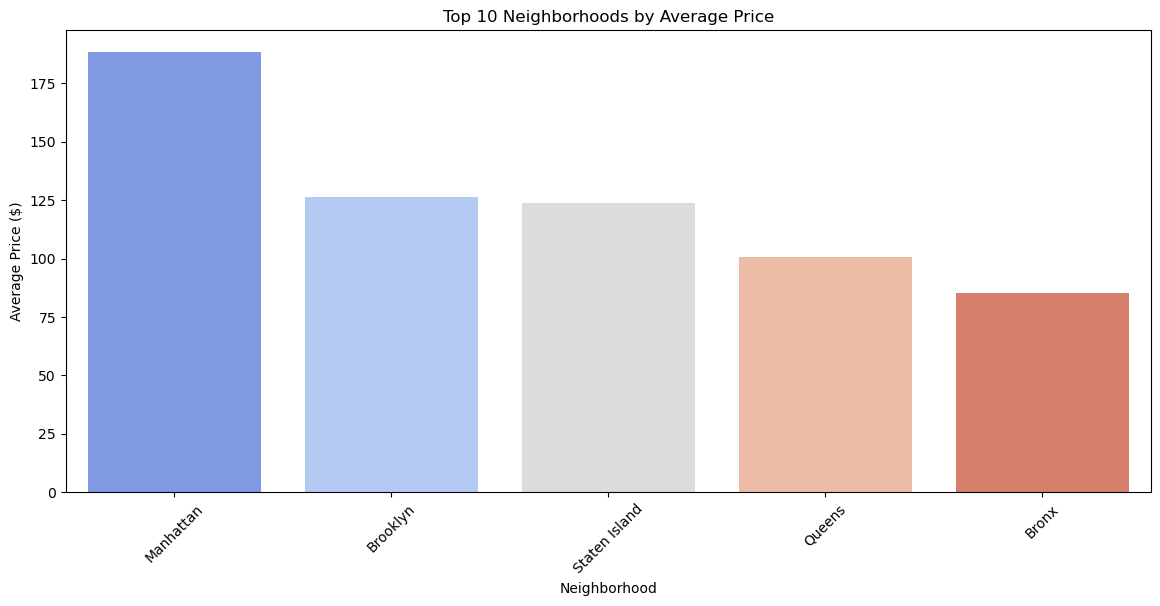

In [82]:
top10_neigh = df.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14,6))
sns.barplot(x=top10_neigh.index, y=top10_neigh.values, palette='coolwarm')
plt.title('Top 10 Neighborhoods by Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


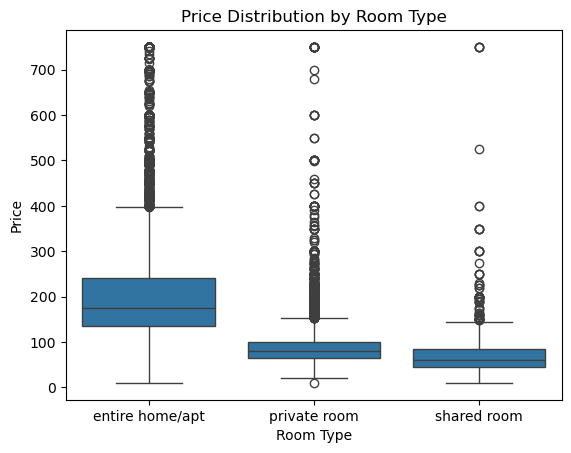

In [100]:
sns.boxplot(x='Room Type', y='Price', data=df)
plt.title('Price Distribution by Room Type')
plt.show()


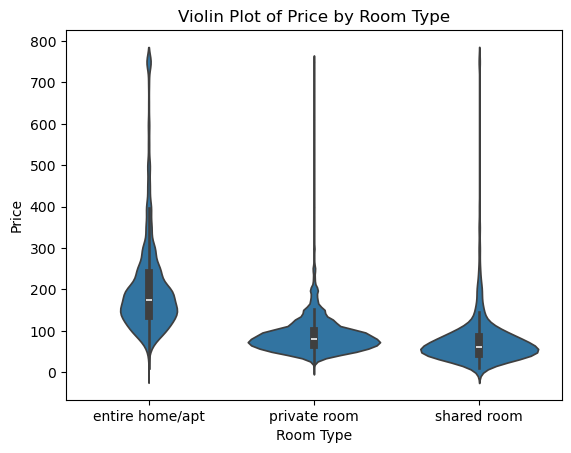

In [102]:
sns.violinplot(x='Room Type', y='Price', data=df)
plt.title('Violin Plot of Price by Room Type')
plt.show()


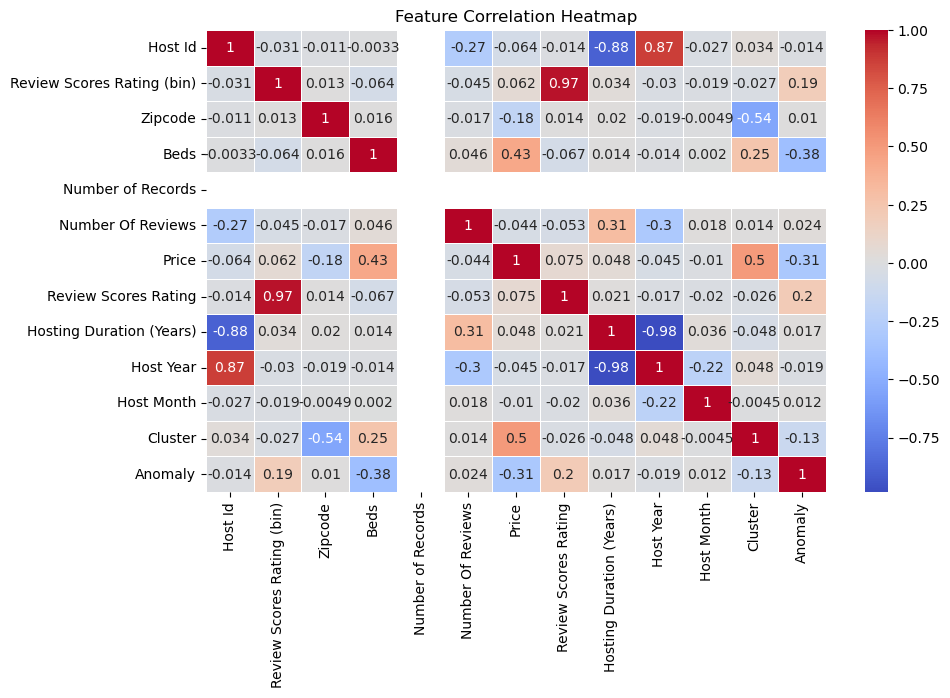

In [104]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


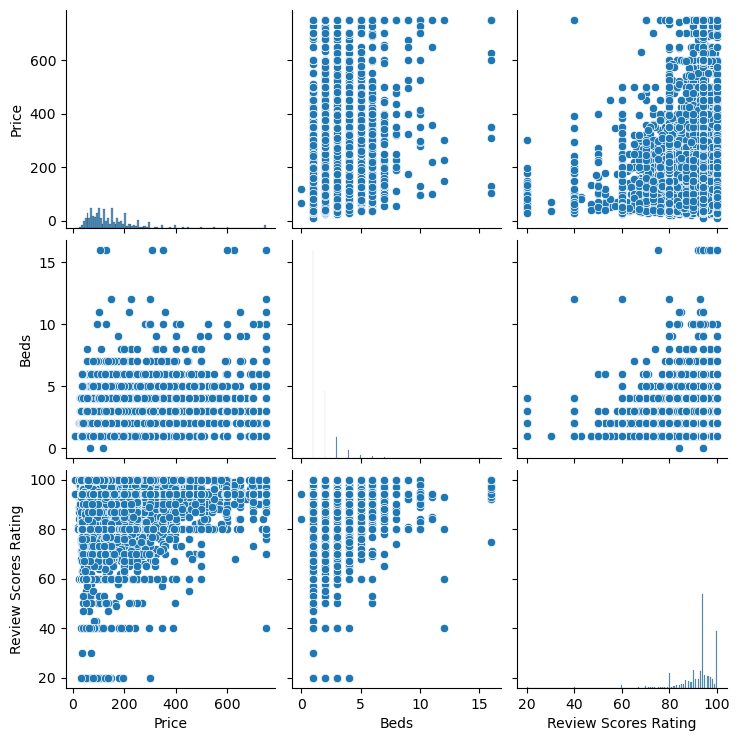

In [106]:
sns.pairplot(df[['Price', 'Beds', 'Review Scores Rating']])
plt.show()


C:\Users\rithi\AppData\Local\Temp\ipykernel_23352\3778677786.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


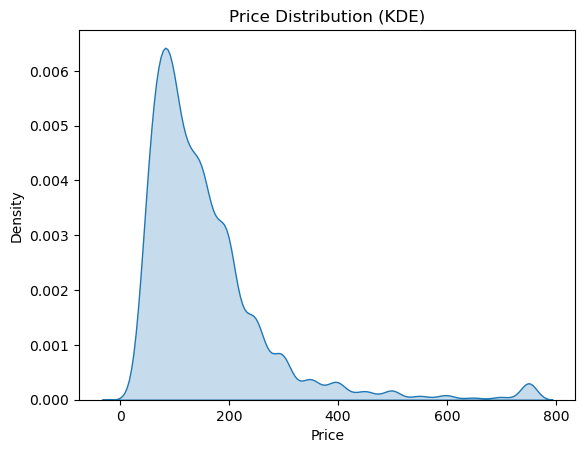

In [108]:
sns.kdeplot(df['Price'], shade=True)
plt.title('Price Distribution (KDE)')
plt.show()


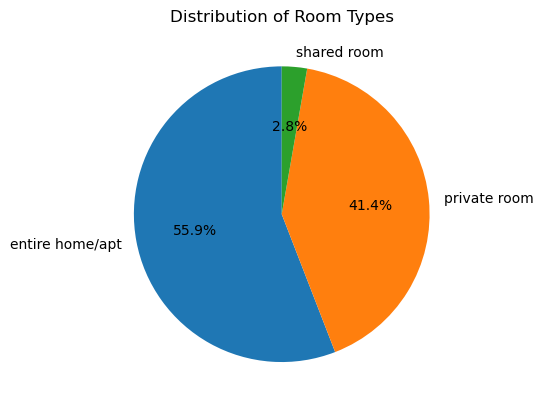

In [110]:
df['Room Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Room Types')
plt.ylabel('')
plt.show()


Cluster Analysis

lets prepare data for clustering

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Select features for clustering
features = ['Price', 'Beds', 'Review Scores Rating']

# Encode categorical variables 'Room Type' and 'Neighbourhood' using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Room Type', 'Neighbourhood'], drop_first=True)

# Combine features
cluster_features = df_encoded[features + [col for col in df_encoded.columns if col.startswith('Room Type_') or col.startswith('Neighbourhood_')]]

# Handle missing values if any (e.g., fill with median)
cluster_features.fillna(cluster_features.median(), inplace=True)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)


C:\Users\rithi\AppData\Local\Temp\ipykernel_23352\905500686.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_features.fillna(cluster_features.median(), inplace=True)


Choose number of clusters and K fit means 

In [86]:
# Choose number of clusters, say 4 (we can tune later)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to original dataframe
df['Cluster'] = kmeans.labels_


Analyse clusters

In [88]:
# Average values per cluster
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

# Count listings per cluster
print(df['Cluster'].value_counts())


              Price      Beds  Review Scores Rating
Cluster                                            
0        111.606504  1.396914             92.806364
1         96.542426  1.464238             92.270546
2        154.231792  1.286539             92.428612
3        419.665764  3.497485             92.214313
Cluster
2    14211
0    11408
3     2585
1     2251
Name: count, dtype: int64


Elbow method to choose K

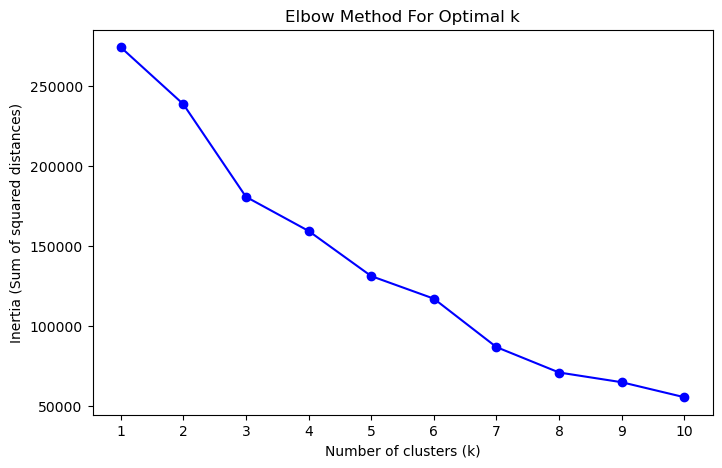

In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)  # testing k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range)
plt.show()


Anamoly Detection

Prepare the data

In [92]:
import numpy as np
import pandas as pd

# Select relevant numeric columns
anomaly_features = ['Price', 'Beds', 'Review Scores Rating']

# Fill missing values with median
data = df[anomaly_features].copy()
data.fillna(data.median(), inplace=True)

data.head()


,Price,Beds,Review Scores Rating
3,199.0,3.0,94.0
4,549.0,3.0,96.0
5,149.0,1.0,100.0
6,250.0,1.0,100.0
7,90.0,1.0,94.0


Use Isolation Forest to detect anomalies

In [94]:
from sklearn.ensemble import IsolationForest

# Initialize model
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # assuming 1% anomalies

# Fit model
iso_forest.fit(data)

# Predict anomalies: -1 means anomaly, 1 means normal
df['Anomaly'] = iso_forest.predict(data)

# Count anomalies found
print("Number of anomalies detected:", (df['Anomaly'] == -1).sum())


Number of anomalies detected: 305


Explore anomalies

In [96]:
# View anomaly records
anomalies = df[df['Anomaly'] == -1]
print(anomalies[anomaly_features + ['Anomaly']])

# Optionally, view some stats
print("Anomaly Price stats:")
print(anomalies['Price'].describe())


       Price  Beds  Review Scores Rating  Anomaly
101    750.0   6.0                 100.0       -1
320     45.0   1.0                  40.0       -1
399    385.0   4.0                  60.0       -1
501    475.0   8.0                  80.0       -1
680    750.0   3.0                 100.0       -1
...      ...   ...                   ...      ...
29444   64.0   3.0                  40.0       -1
29662  590.0   7.0                  94.0       -1
29954   50.0   3.0                  60.0       -1
30249  104.0  16.0                 100.0       -1
30281  750.0   4.0                  94.0       -1

[305 rows x 4 columns]
Anomaly Price stats:
count    305.000000
mean     516.859016
std      266.535935
min       30.000000
25%      300.000000
50%      650.000000
75%      750.000000
max      750.000000
Name: Price, dtype: float64


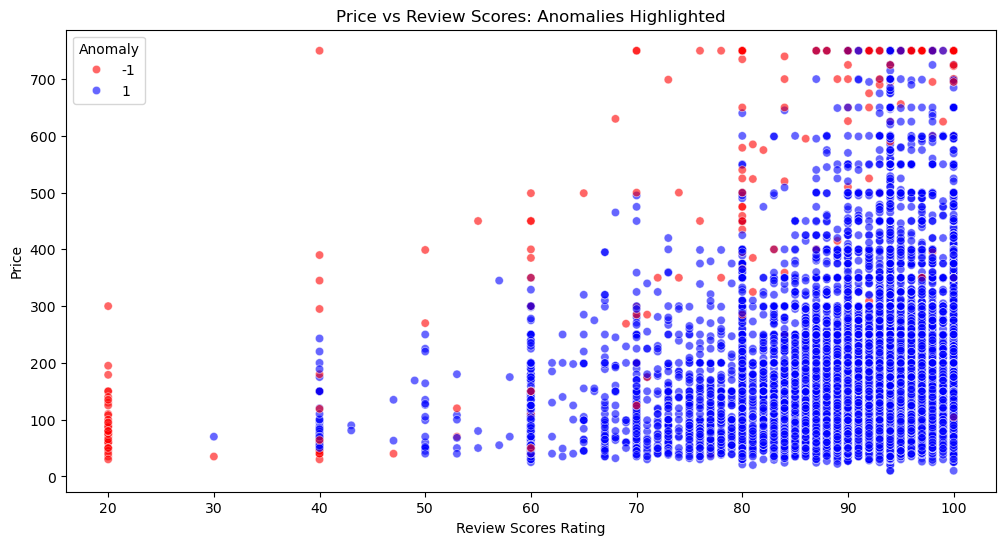

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x='Review Scores Rating', y='Price', data=df, hue='Anomaly', palette={1:'blue', -1:'red'}, alpha=0.6)
plt.title('Price vs Review Scores: Anomalies Highlighted')
plt.show()


Feature Engineering

In [112]:
# Create 'Price per Bed'
df['Price_per_Bed'] = df['Price'] / df['Beds']

# Create 'Rating Category'
def categorize_rating(score):
    if score >= 90:
        return 'Excellent'
    elif score >= 70:
        return 'Good'
    elif score >= 50:
        return 'Average'
    else:
        return 'Poor'

df['Rating_Category'] = df['Review Scores Rating'].apply(categorize_rating)

# Create 'Is Expensive'
df['Is_Expensive'] = df['Price'].apply(lambda x: 1 if x > 300 else 0)

df[['Price', 'Beds', 'Price_per_Bed', 'Review Scores Rating', 'Rating_Category', 'Is_Expensive']].head()


,Price,Beds,Price_per_Bed,Review Scores Rating,Rating_Category,Is_Expensive
3,199.0,3.0,66.333333,94.0,Excellent,0
4,549.0,3.0,183.000000,96.0,Excellent,1
5,149.0,1.0,149.000000,100.0,Excellent,0
6,250.0,1.0,250.000000,100.0,Excellent,0
7,90.0,1.0,90.000000,94.0,Excellent,0


In [ ]:
Predictive Modeling 

In [128]:
# Select meaningful features for prediction
features = [
    'Beds',
    'Review Scores Rating',
    'Hosting Duration (Years)',
    'Number Of Reviews'
]

# Target variable
target = 'Price'

X = df[features]
y = df[target]


In [130]:
# Check for nulls
print(X.isnull().sum())

# Fill missing values with mean (or use more advanced techniques if needed)
X = X.fillna(X.mean())


Beds                        0
Review Scores Rating        0
Hosting Duration (Years)    0
Number Of Reviews           0
dtype: int64


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize model
lr = LinearRegression()

# Train
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 70.2436194816428
RMSE: 107.13255377140467
R² Score: 0.21087618016009257


Ridge Regression

In [136]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R² Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression Performance:
MAE: 70.24364787457021
RMSE: 107.13257386074264
R² Score: 0.21087588420940273


Lasso Regression

In [138]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R² Score:", r2_score(y_test, y_pred_lasso))



Lasso Regression Performance:
MAE: 70.24713411610168
RMSE: 107.13640309075552
R² Score: 0.210819472015762


Decision Tree Regression

In [140]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))



Decision Tree Regressor Performance:
MAE: 91.08154074898584
RMSE: 136.6057095592596
R² Score: -0.2830392453506463


Random Forest Regression

In [143]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))



Random Forest Regressor Performance:
MAE: 75.44113086709905
RMSE: 112.92664205035997
R² Score: 0.12321105298336565


xgboost

In [149]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.1/150.0 MB 751.6 kB/s eta 0:03:20
   ---------------------------------------- 0.2/150.0 MB 1.5 MB/s eta 0:01:40
   ---------------------------------------- 0.5/150.0 MB 2.5 MB/s eta 0:01:01
   ---------------------------------------- 0.9/150.0 MB 3.6 MB/s eta 0:00:42
   ---------------------------------------- 1.2/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.6/150.0 MB 4.6 MB/s eta 0:00:33
    --------------------------------------- 2.0/150.0 MB 5.0 MB/s eta 0:00:30
    --------------------------------------- 2.3/150.0 MB 5.2 MB/s eta 0:00:29
    --------------------------------------- 2.6/150.0 MB 5.4 MB/s eta 0:00:28
    --------------------------------------- 3.1/150.0 MB 5.8 MB/s eta 0:00

In [151]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

print("\nXGBoost Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))



XGBoost Regressor Performance:
MAE: 69.81444883722328
RMSE: 104.44545500128108
R² Score: 0.24996534516786106


Neural Network

In [153]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("\nMLP Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("R² Score:", r2_score(y_test, y_pred_mlp))



MLP Regressor Performance:
MAE: 70.55452173026369
RMSE: 105.76176302699392
R² Score: 0.2309411018602574


Model Comparison Table

In [155]:
import pandas as pd

results = {
    'Model': [
        'Linear Regression', 'Ridge Regression', 'Lasso Regression',
        'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'
    ],
    'MAE': [
        70.2436, 70.2436, 70.2471,
        91.0815, 75.4411, 69.8144, 70.5545
    ],
    'RMSE': [
        107.1326, 107.1326, 107.1364,
        136.6057, 112.9266, 104.4455, 105.7618
    ],
    'R2 Score': [
        0.2109, 0.2109, 0.2108,
        -0.2830, 0.1232, 0.2500, 0.2309
    ]
}

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))


               Model      MAE      RMSE  R2 Score
5            XGBoost  69.8144  104.4455    0.2500
6     Neural Network  70.5545  105.7618    0.2309
0  Linear Regression  70.2436  107.1326    0.2109
1   Ridge Regression  70.2436  107.1326    0.2109
2   Lasso Regression  70.2471  107.1364    0.2108
4      Random Forest  75.4411  112.9266    0.1232
3      Decision Tree  91.0815  136.6057   -0.2830


Feature Importance 

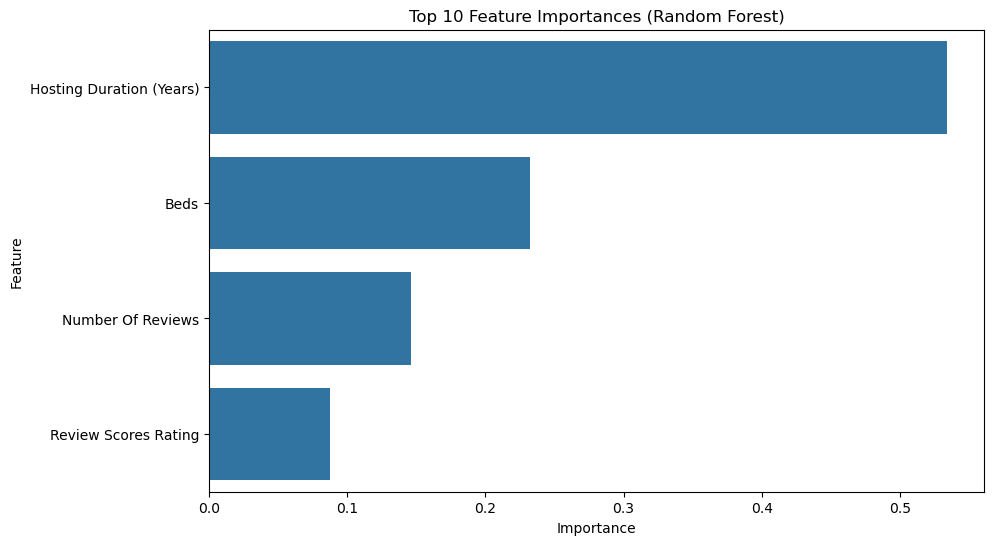

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf is your trained Random Forest model
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

top_features = feat_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Hyperparameter Tuning 

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = best_rf.predict(X_test)

print("Tuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Performance:
MAE: 68.84698008939895
RMSE: 103.35038279057122
R2 Score: 0.26561057113760134


In [161]:
import joblib

# Retrain best model (e.g., tuned Random Forest) on full dataset
best_rf.fit(X, y)

# Save the model
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print("Model saved as best_random_forest_model.pkl")


Model saved as best_random_forest_model.pkl
